In [2]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from matplotlib.path import Path

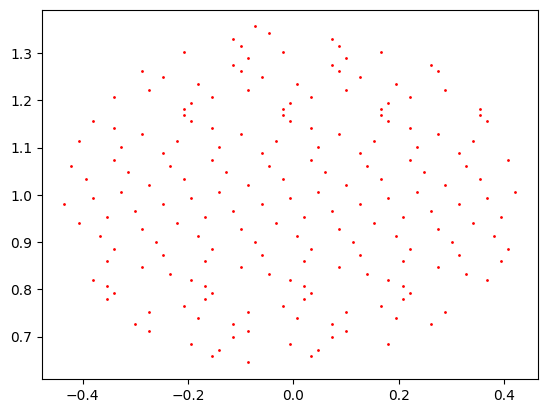

In [3]:
path = 'velocity_results/alpha04_2D_'
Ux_file = np.load(path + 'Ux.npy').T
Ur_file = np.load(path + 'Uy.npy').T

x_2D = np.load(path + 'x.npy')
r_2D = np.load(path + 'y.npy')
X_2D, R_2D = np.meshgrid(x_2D, r_2D)
int_points = np.vstack([X_2D.ravel(), R_2D.ravel()]).T

# Ux_file = Ux_file[:,r_2D>0]
# Ur_file = Ur_file[:,r_2D>0]
# r_2D = r_2D[r_2D>0]

geometry_2D = np.load(path + 'geometry.npy')

x_core_2d, y_core_2d, _, x_ring_2d, y_ring_2d = geometry_2D.T


upper_core = Path(np.vstack([x_core_2d, y_core_2d]).T).contains_points(int_points)
upper_points = int_points[upper_core]

x_incore_2d = upper_points[:, 0].astype(np.float16)
y_incore_2d = upper_points[:, 1].astype(np.float16)
plt.scatter(x_incore_2d[::14], y_incore_2d[::14], c='r', s=1)

In [4]:
theta = np.linspace(0, 2*np.pi, 5)
X_polar, R_polar, Theta_polar = np.meshgrid(x_2D, r_2D, theta, indexing='ij')
X_core, Y_core, Theta_core = np.meshgrid(x_incore_2d, y_incore_2d, theta, indexing='ij')

Y_cartesian = R_polar * np.cos(Theta_polar)
Z_cartesian = R_polar * np.sin(Theta_polar)

Y_core_cartesian = Y_core * np.cos(Theta_core)
Z_core_cartesian = Y_core * np.sin(Theta_core)

# # Ux_cartesian = np.broadcast_to(Ux_file[:, :, None], (300, 150, 100))
# # Uy_cartesian = np.broadcast_to(Ur_file[:, :, None], (300, 150, 100)) * np.cos(theta)
# # Uz_cartesian = np.broadcast_to(Ur_file[:, :, None], (300, 150, 100)) * np.sin(theta)

# Ux_cartesian = np.broadcast_to(Ux_file[:, :, None], Y_cartesian.shape)
# Uy_cartesian = np.broadcast_to(Ur_file[:, :, None], Y_cartesian.shape) * np.cos(theta)
# Uz_cartesian = np.broadcast_to(Ur_file[:, :, None], Y_cartesian.shape) * np.sin(theta)

# print(X_polar[132,35,57], Y_cartesian[132,35,57], Z_cartesian[132,35,57], Ux_cartesian[132,35,57], Uy_cartesian[132,35,57], Uz_cartesian[132,35,57])


(-2.0, 2.0)

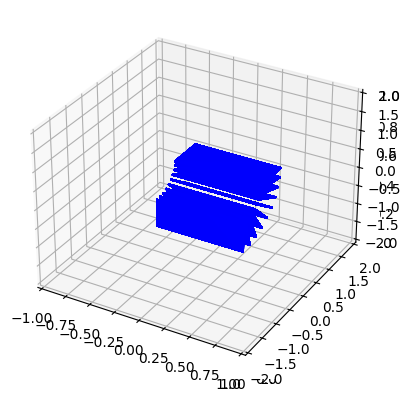

In [21]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax = fig.add_subplot(111, projection='3d')
# ax.scatter3D(X_polar[::10, ::10, ::10].flatten(), Y_cartesian[::10, ::10, ::10].flatten(), Z_cartesian[::10, ::10, ::10].flatten(), c='r', s=0.1)
ax.scatter3D(X_core[:, :, 270::10].flatten(), Y_core[:, :, 270::10].flatten(), Z_core_cartesian[:, :, 270::10].flatten(), c='b', s=0.1)
ax.set_xlim(-1, 1)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

(-2.0, 2.0)

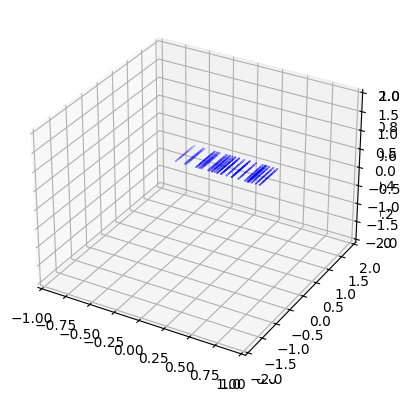

In [5]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax = fig.add_subplot(111, projection='3d')
# ax.scatter3D(X_polar[::10, ::10, ::10].flatten(), Y_cartesian[::10, ::10, ::10].flatten(), Z_cartesian[::10, ::10, ::10].flatten(), c='r', s=0.1)
ax.scatter3D(X_core[::100, ::100, 0].flatten(), Y_core_cartesian[::100, ::100, 0].flatten(), Z_core_cartesian[::100, ::100, 0].flatten(), c='b', s=0.1)
ax.set_xlim(-1, 1)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

In [9]:
print(Ux_file[132, 35], Ur_file[132, 35]*np.cos(theta[57]), Ur_file[132, 35]*np.sin(theta[57]))

-1.9756027577747095 0.274055885031479 0.42200905548717194


Text(0.5, 0.5, 'Z')

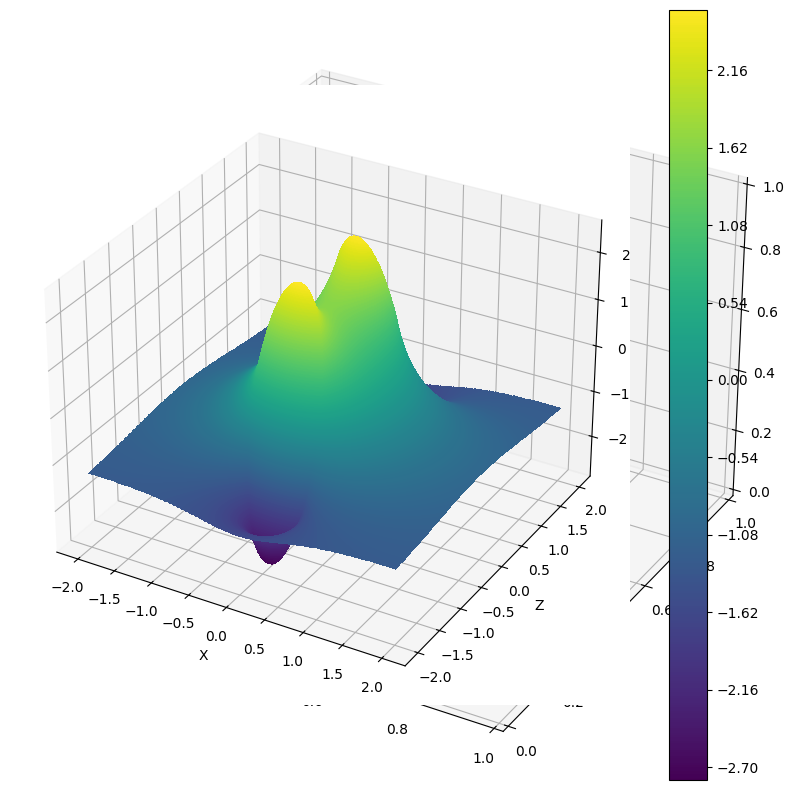

In [15]:
k = 180
ux_test = Ux_cartesian[:, :, k]
uy_test = Uy_cartesian[:, :, k]
uz_test = Uz_cartesian[:, :, k]

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

c = ax.contourf3D(X_polar[:, :, k], Y_cartesian[:, :, k], ux_test, 500, cmap='viridis')
fig.colorbar(c)
ax.set_xlabel('X')
ax.set_ylabel('Z')

In [19]:
np.max(Y_cartesian[:, :, k])

2.0